In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # larger fonts
import fitsio, pickle

Example data consisting of the average relative ellipticity ($\mathcal{E}$) and 2-pt correlation function in given $r_p$ and $r_\|$ bins

In [2]:
# pre-made bins corresponding to data
nrp_bins = 20
npar_bins = 30

rp_bin_edges_log = np.logspace(0, 2, nrp_bins+1)
rpar_bin_edges_log = np.logspace(0, 2, npar_bins+1)
rp_bins_log = 0.5*(rp_bin_edges_log[1:] + rp_bin_edges_log[:-1])
rpar_bins_log = 0.5*(rpar_bin_edges_log[1:] + rpar_bin_edges_log[:-1])

# read binned pairs
binned_pairs_rsp_av = -fitsio.read('example_data/binned_pairs_rsp_log_1_100.fits')        # real space
binned_pairs_rsd_av = -fitsio.read('example_data/binned_pairs_rsd_av_log_1_100.fits')     # redshift space

$\mu$ weights

In [3]:
# singh weights
def get_mu(r_p, r_par):
    return np.cos(np.arctan2(r_p, r_par))

grid_2D = np.meshgrid(rp_bins_log, rpar_bins_log)
mu_weights = 1 - get_mu(*grid_2D)**2
mu_weights = mu_weights.T

Plotting

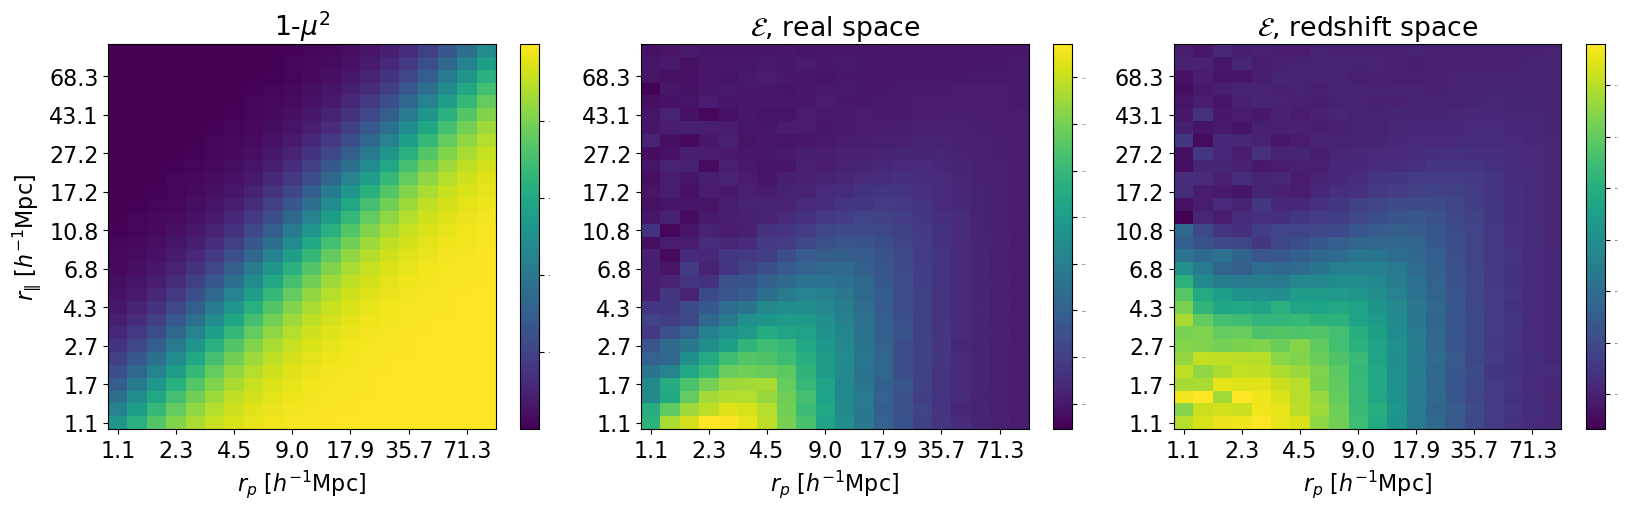

In [4]:
def setup_subplot(ax, title, data, plt_args, rp_bins_log, rpar_bins_log):
    ax.set_title(title)
    im = ax.imshow(data.transpose(), **plt_args)
    if title == r'1-$\mu^2$':
        ax.set_ylabel(r'$r_{\|}$ [$h^{-1}$Mpc]')
    ax.set_xlabel(r'$r_p$ [$h^{-1}$Mpc]')
    ax.set_xticks(np.arange(len(rp_bins_log))[::3])
    ax.set_xticklabels(np.round(rp_bins_log[::3], 1))
    ax.set_yticks(np.arange(len(rpar_bins_log))[::3])
    ax.set_yticklabels(np.round(rpar_bins_log[::3], 1))
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=0)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

plt_args = {'cmap': 'viridis', 'origin': 'lower', 'aspect': 'auto'}

setup_subplot(axes[0], r'1-$\mu^2$', mu_weights, plt_args, rp_bins_log, rpar_bins_log)
setup_subplot(axes[1], r'$\mathcal{E}$, real space', binned_pairs_rsp_av, plt_args, rp_bins_log, rpar_bins_log)
setup_subplot(axes[2], r'$\mathcal{E}$, redshift space', binned_pairs_rsd_av, plt_args, rp_bins_log, rpar_bins_log)

plt.subplots_adjust(wspace=0.1)  # Adjust the width space between subplots

Normalizing in each $r_p$ bin 

In [5]:
def get_weight(binned_Erel):
    weight = binned_Erel #gaussian_filter(binned_Erel, .5)
    weight_normalized = weight / np.nansum(weight, axis=1)[:, np.newaxis]
    return weight_normalized

binned_pairs_rsp_av_normed = get_weight(binned_pairs_rsp_av)
binned_pairs_rsd_av_normed = get_weight(binned_pairs_rsd_av)
mu_weights_normed = get_weight(mu_weights)

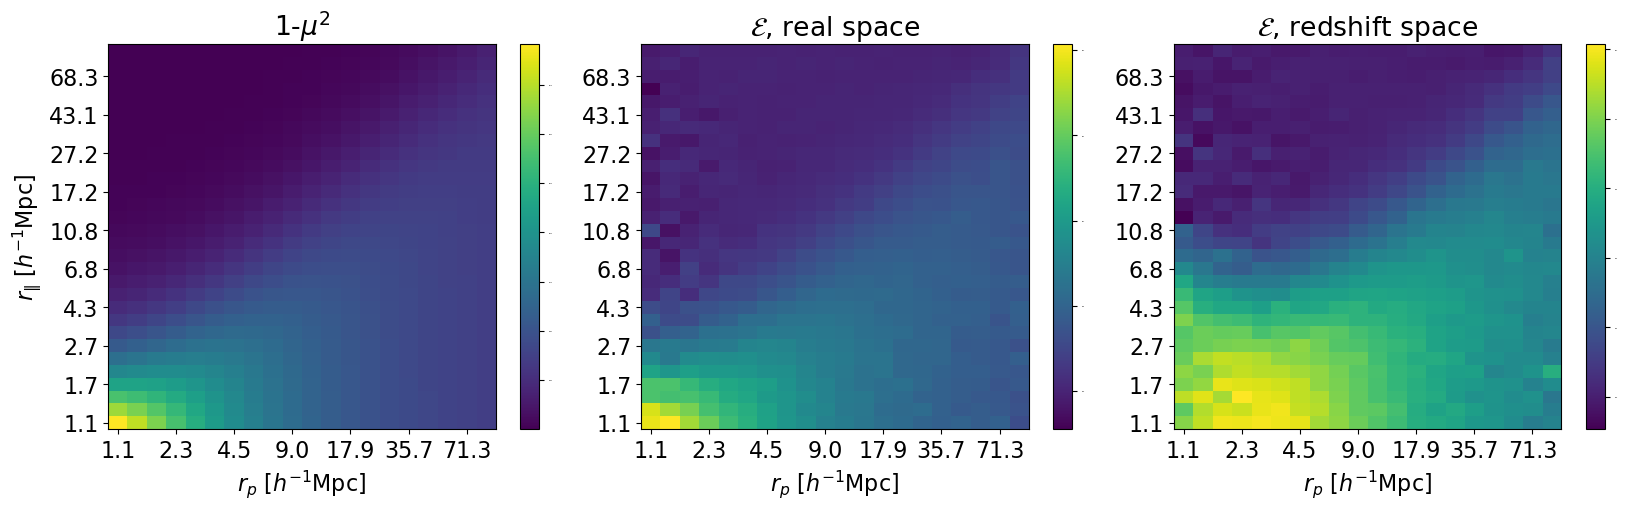

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

plt_args = {'cmap': 'viridis', 'origin': 'lower', 'aspect': 'auto'}

setup_subplot(axes[0], r'1-$\mu^2$', mu_weights_normed, plt_args, rp_bins_log, rpar_bins_log)
setup_subplot(axes[1], r'$\mathcal{E}$, real space', binned_pairs_rsp_av_normed, plt_args, rp_bins_log, rpar_bins_log)
setup_subplot(axes[2], r'$\mathcal{E}$, redshift space', binned_pairs_rsd_av_normed, plt_args, rp_bins_log, rpar_bins_log)

plt.subplots_adjust(wspace=0.1)  # Adjust the width space between subplots

Correlation function

In [7]:
# read in pre-computed values for estimating 2pt correlation functions
with open('example_data/abacus_corrfunc_spline_rsd0.pkl', 'rb') as f:  # without RSD
    interp = pickle.load(f)
corr_func_rsp = interp(rp_bins_log, rpar_bins_log)

with open('example_data/abacus_corrfunc_spline_rsd0.pkl', 'rb') as f:  # with RSD
    interp = pickle.load(f)
corr_func_rsd = interp(rp_bins_log, rpar_bins_log)

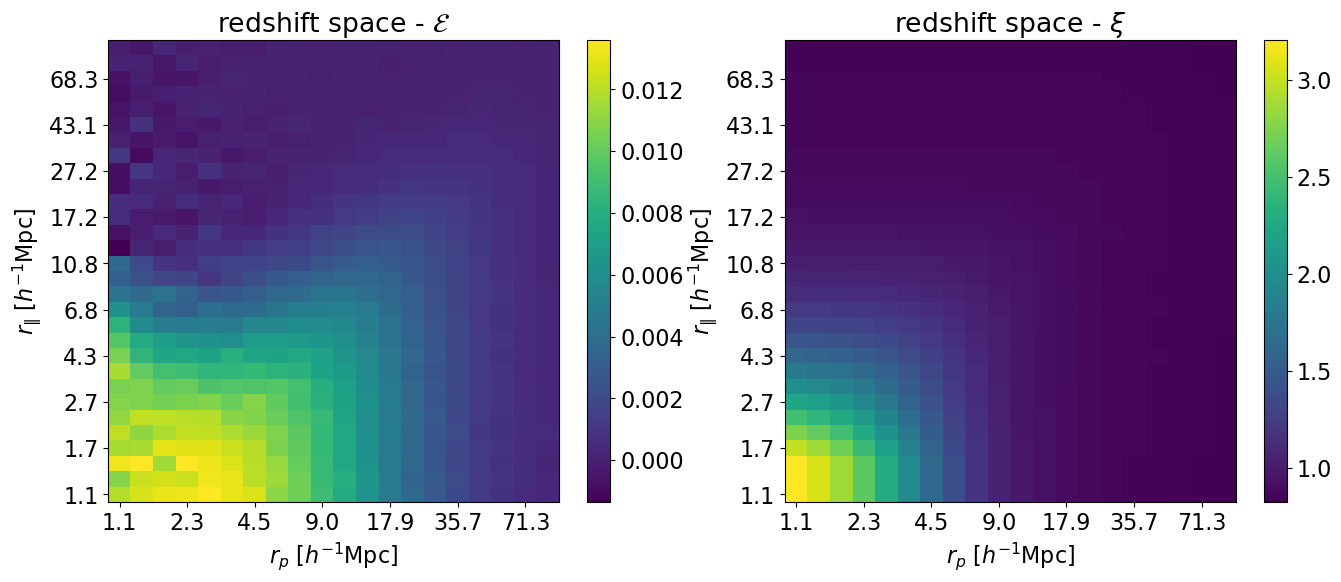

In [8]:
plt_args = {'cmap': 'viridis','origin': 'lower', 'aspect': 'auto'}

fig = plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.title(r'redshift space - $\mathcal{E}$')
plt.imshow(binned_pairs_rsd_av.transpose(), **plt_args)
plt.xlabel(r'$r_p$ [$h^{-1}$Mpc]'); plt.ylabel(r'$r_{\|}$ [$h^{-1}$Mpc]')
plt.xticks(np.arange(len(rp_bins_log))[::3], np.round(rp_bins_log[::3], 1))
plt.yticks(np.arange(len(rpar_bins_log))[::3], np.round(rpar_bins_log[::3], 1))
plt.colorbar();

plt.subplot(122)
plt.title(r'redshift space - $\xi$')
plt.imshow(corr_func_rsd.transpose(), **plt_args)
plt.xlabel(r'$r_p$ [$h^{-1}$Mpc]'); plt.ylabel(r'$r_{\|}$ [$h^{-1}$Mpc]')
plt.xticks(np.arange(len(rp_bins_log))[::3], np.round(rp_bins_log[::3], 1))
plt.yticks(np.arange(len(rpar_bins_log))[::3], np.round(rpar_bins_log[::3], 1))
plt.colorbar();